In [11]:
import torch as th
import torchvision as tv
import pro_gan_pytorch.PRO_GAN as pg
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms

# select the device to be used for training
device = th.device("cuda" if th.cuda.is_available() else "cpu")
data_path = "cleanData/landscape"
image_size = 128


In [12]:
# import matplotlib.pyplot as plt
# import numpy as np
# import torchvision.utils as vutils
def setup_data(download=False):
  
    # data setup:
    classes = ('landscape','abstractArt')

    dataset = dset.ImageFolder(root=data_path,
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
    
#     transforms = tv.transforms.ToTensor()

#     trainset = tv.datasets.CIFAR10(root=data_path,
#                                    transform=transforms,
#                                    download=download)

#     testset = tv.datasets.CIFAR10(root=data_path,
#                                   transform=transforms, train=False,
#                                   download=False)

    return classes, dataset


In [13]:


if __name__ == '__main__':

    # some parameters:
    depth = 6
    # hyper-parameters per depth (resolution)
    num_epochs = [100, 100, 120, 120 ,150,150]
    fade_ins = [50, 50, 50, 50,50,50]
    batch_sizes = [32, 32, 32, 32,32,32]
    latent_size = 128

    # get the data. Ignore the test data and their classes
    _, dataset = setup_data()

    # ======================================================================
    # This line creates the PRO-GAN
    # ======================================================================
    pro_gan = pg.ConditionalProGAN(num_classes=2, depth=depth, latent_size=latent_size, device=device)
    # ======================================================================
    print(pro_gan)
    # ======================================================================
    # This line trains the PRO-GAN
    # ======================================================================
    pro_gan.train(
        dataset=dataset,
        epochs=num_epochs,
        fade_in_percentage=fade_ins,
        batch_sizes=batch_sizes,
        feedback_factor=100
    )

Starting the training process ... 


Currently working on Depth:  0
Current resolution: 4 x 4

Epoch: 1
Elapsed: [0:00:06.162129]  batch: 100  d_loss: 851.494324  g_loss: -0.213817
Time taken for epoch: 8.402 secs

Epoch: 2
Elapsed: [0:00:13.674623]  batch: 100  d_loss: 547.943909  g_loss: -0.762950
Time taken for epoch: 7.150 secs

Epoch: 3


KeyboardInterrupt: 

#Upload a trained model and test to generate the images!!

Pytorch load model!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


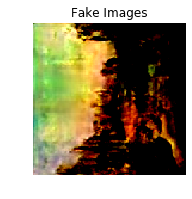

In [101]:
import torch as th
from pro_gan_pytorch import PRO_GAN as pg
import torchvision.utils as vutils
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
device = th.device("cuda" if th.cuda.is_available() else "cpu")

gen = th.nn.DataParallel(pg.Generator(depth=6,latent_size=128))

gen.load_state_dict(th.load("GAN_GEN_5.pth", map_location=str(device)))

# print(gen)

noise = th.randn(32, 128).to(device)
sample_image = gen(noise, depth=5, alpha=0.9).detach()

vutils.save_image(sample_image[0, :, :, :],'portrait_' + str(1) + '.png'.format(3), normalize=True,scale_each=True)

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(sample_image[-1].cpu()))
plt.show()

In [40]:
import random

for x in range(10):
    noise = th.randn(32, 128).to(device)
    sample_image = gen(noise, depth=5, alpha=1).detach()
    vutils.save_image(sample_image[random.randint(1, 30),:,:,:], '/home/ubuntu/GanZoo/samples/portrait_' + str(x) + '.png'.format(3))

